In [1]:
import random
import cupy as cp
#import numpy as cp
from matplotlib import pyplot as plt

In [2]:
class RandomImage:
    def __init__(self,list_figures,index_random):
        self.recursion = 0
        self.list_figures = list_figures
        self.index_random = cp.asnumpy(index_random).item(0)
        #self.index_random = index_random
        
        self.percentage_info = list_figures.params.percentage_info
        self.image = self.random_figure()
        
    def normalize(self,figure):
        figure = figure - cp.min(figure)
        if (cp.max(figure) == 0):
            figure = figure/0.000001
        else:
            figure = figure/cp.max(figure)
        return figure
    
    def random_operation(self,figure_a,figure_b):
        random.seed(self.index_random)
        self.index_random = self.index_random+1
        operators = ['-','+','*']
        operator = random.choice(operators)
        if (operator == '+'):
              figure_a = figure_b + figure_a
        elif (operator == '*'):
              figure_a = figure_b * figure_a
        elif (operator == '-'):
              figure_a = figure_b - figure_a
        figure_a = self.normalize(figure_a)
        return figure_a


    def get_percentage_info(self,figure):
        n = len(figure)
        c = cp.sum(figure>0) 
        percentage=(c)/(n*n)
        return percentage
    
    def isNull(self,figure):
        if (self.get_percentage_info(figure) < self.percentage_info):
            return True
        return False
    

    def random_figure(self):
        size_list_figure = self.list_figures.len_list()
        random.seed(self.index_random)
        random_index = random.randrange(0,size_list_figure-1,1);
        final_figure = self.list_figures.data[random_index].data    
        for figure in self.list_figures.data:
                final_figure = self.random_operation(final_figure,figure.data)
        final_figure_copy  = cp.copy(final_figure)
        final_figure[final_figure_copy ==0]=0       
        if (self.isNull(final_figure) == False):
            final_figure = self.normalize(final_figure)
            return final_figure
        else:
            self.recursion = self.recursion+1
            self.index_random  = self.index_random + 100
            return self.random_figure()        
    def get(self):
        return self.image

    def view(self):
        #plt.imshow(cp.asnumpy(self.image))
        plt.imshow(self.image)


        

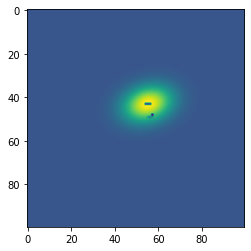

In [26]:
#from listEllipses import ListEllipses
#from paramsEllipses import ParamsEllipses
#params= ParamsEllipses(100)
#listEllipses = ListEllipses(params,10)
#randomImage = RandomImage(listEllipses,99)
#randomImage.view()